# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [5]:
! pip install Pillow


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [7]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...


In [8]:
!ls MNIST

'ls' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [9]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [10]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

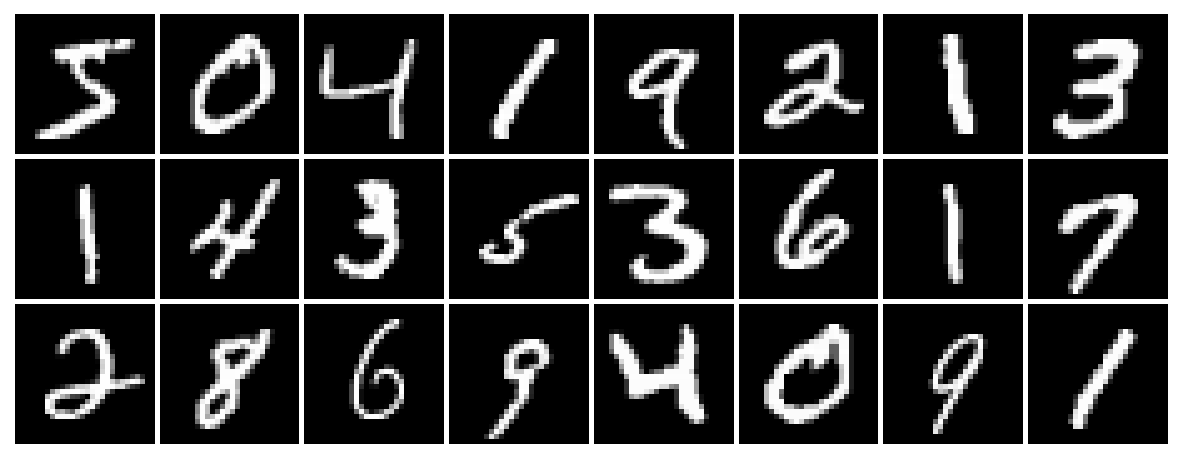

In [11]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


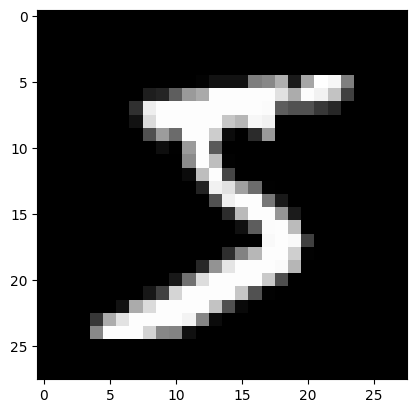

In [12]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [13]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [14]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[ 0.0976,  0.0455,  0.0361, -0.0040, -0.1413, -0.2360, -0.0230, -0.0623,
          0.2090, -0.0874],
        [-0.1059,  0.0296,  0.0144,  0.1193, -0.0707, -0.2844,  0.1228, -0.0468,
          0.1476, -0.2953],
        [-0.0672,  0.1947,  0.0299,  0.2019, -0.1326, -0.0169,  0.0996,  0.1421,
         -0.2602, -0.0188],
        [-0.0986,  0.1885, -0.0776,  0.0182,  0.0170, -0.0619,  0.1876, -0.1539,
         -0.0693, -0.2827],
        [ 0.0231,  0.1503,  0.0055,  0.3258, -0.1177,  0.0560, -0.1456, -0.0186,
         -0.1684, -0.2364]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [15]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [16]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Cloning https://github.com/szagoruyko/pytorchviz to c:\users\natic\appdata\local\temp\pip-req-build-fdfebxzm
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=5015 sha256=e52a9af6d3727b6d3b83f0a2c2fa81b74e74c81172c0b94519a42a45fa2c5755
  Stored in directory: C:\Users\natic\AppData\Local\Temp\pip-ephem-wheel-cache-_c1ifv1p\wheels\63\59\c1\3342e0bca82db7c512109b8da472d40be5c95cca7ce5363332
Successfully built torchviz


  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz 'C:\Users\natic\AppData\Local\Temp\pip-req-build-fdfebxzm'
  DEPRECATION: Building 'torchviz' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'torchviz'. Discussion can be found at https://github.com/pypa/pip/issues/6334

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3269, grad_fn=<NllLossBackward0>)

In [26]:
p = make_dot(loss, dict(model.named_parameters()))
p

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### Laço de treinamento dos pesos

Época 101/100,  Loss = 0.08747,  Acc = 0.9970


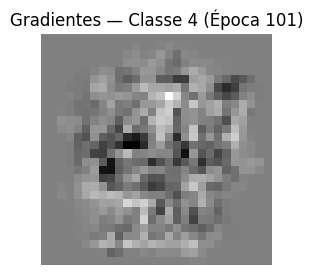

Época 101/100,  Loss = 0.08732,  Acc = 0.9970


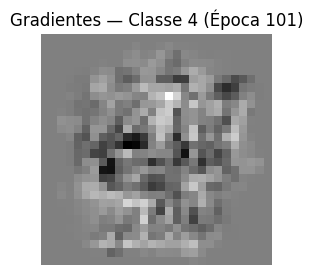

Época 101/100,  Loss = 0.08716,  Acc = 0.9970


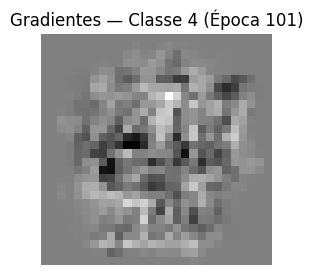

Época 101/100,  Loss = 0.08701,  Acc = 0.9970


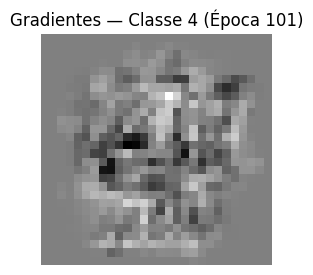

Época 101/100,  Loss = 0.08685,  Acc = 0.9970


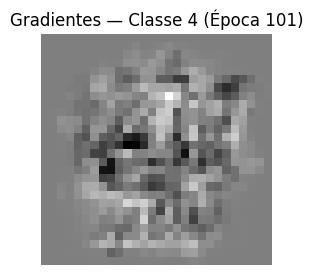

Época 101/100,  Loss = 0.08670,  Acc = 0.9970


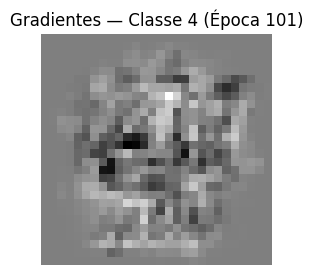

Época 101/100,  Loss = 0.08654,  Acc = 0.9970


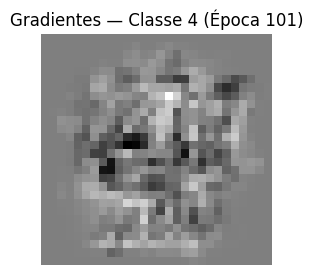

Época 101/100,  Loss = 0.08639,  Acc = 0.9970


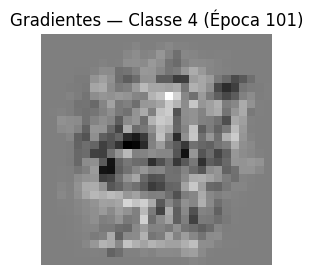

Época 101/100,  Loss = 0.08624,  Acc = 0.9970


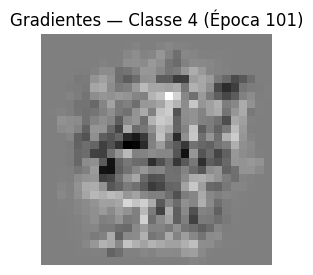

Época 101/100,  Loss = 0.08608,  Acc = 0.9970


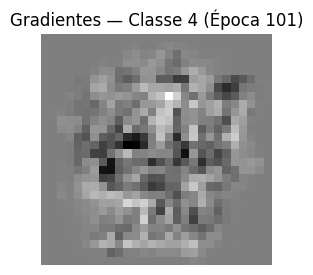

Época 101/100,  Loss = 0.08593,  Acc = 0.9970


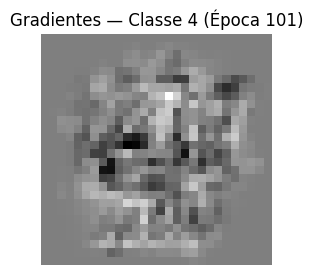

Época 101/100,  Loss = 0.08578,  Acc = 0.9970


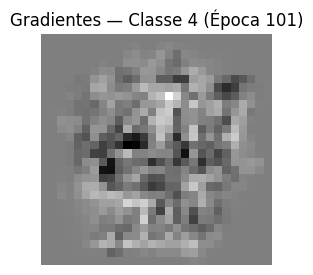

Época 101/100,  Loss = 0.08563,  Acc = 0.9970


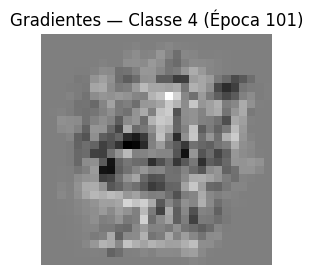

Época 101/100,  Loss = 0.08548,  Acc = 0.9970


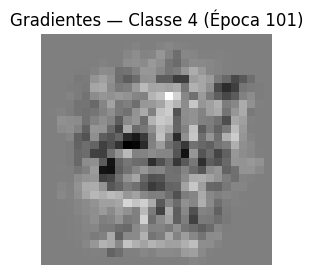

Época 101/100,  Loss = 0.08533,  Acc = 0.9970


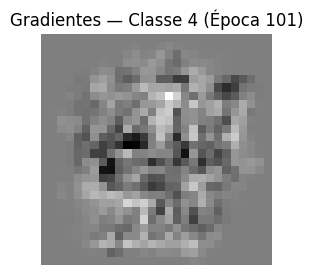

Época 101/100,  Loss = 0.08518,  Acc = 0.9970


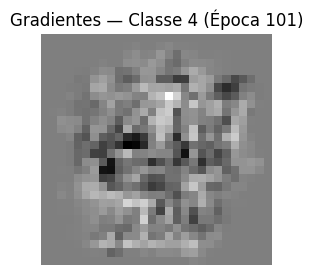

Época 101/100,  Loss = 0.08503,  Acc = 0.9970


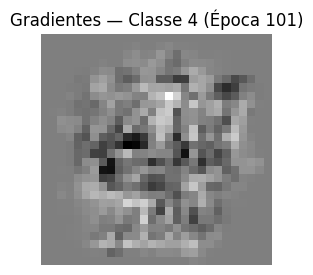

Época 101/100,  Loss = 0.08488,  Acc = 0.9970


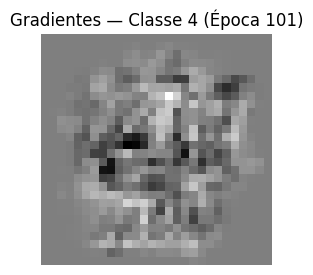

Época 101/100,  Loss = 0.08474,  Acc = 0.9970


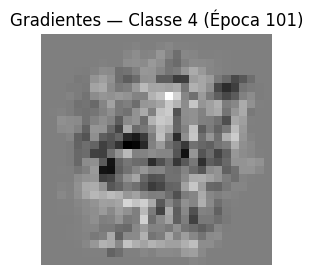

Época 101/100,  Loss = 0.08459,  Acc = 0.9970


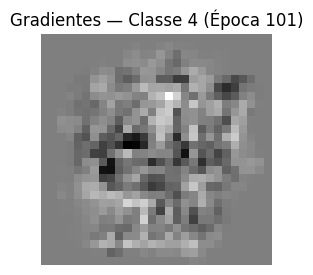

Época 101/100,  Loss = 0.08444,  Acc = 0.9970


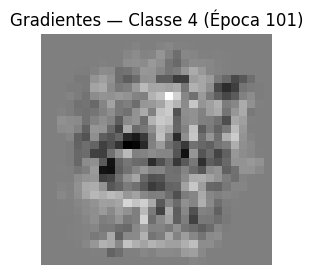

Época 101/100,  Loss = 0.08429,  Acc = 0.9970


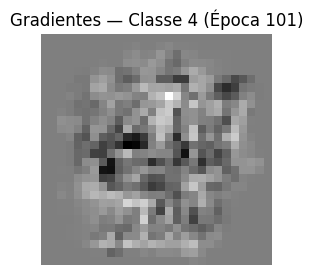

Época 101/100,  Loss = 0.08415,  Acc = 0.9970


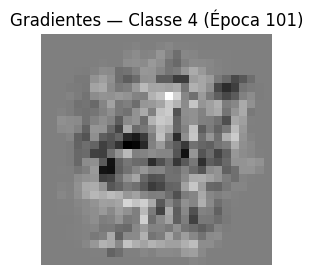

Época 101/100,  Loss = 0.08400,  Acc = 0.9970


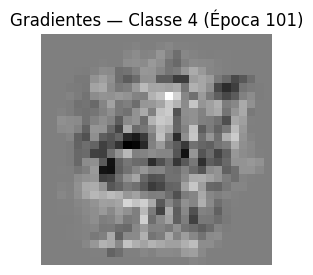

Época 101/100,  Loss = 0.08386,  Acc = 0.9970


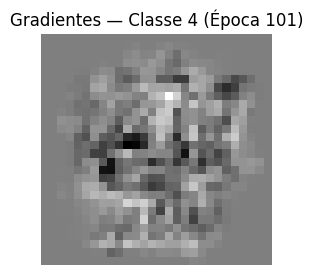

Época 101/100,  Loss = 0.08371,  Acc = 0.9970


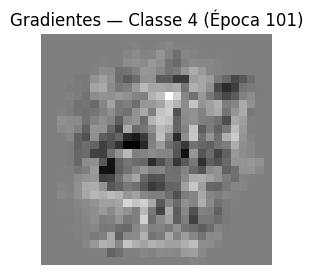

Época 101/100,  Loss = 0.08357,  Acc = 0.9970


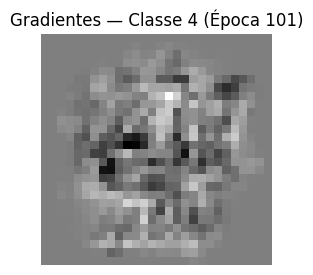

Época 101/100,  Loss = 0.08343,  Acc = 0.9970


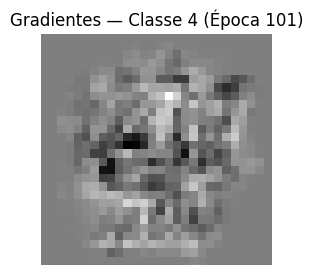

Época 101/100,  Loss = 0.08328,  Acc = 0.9970


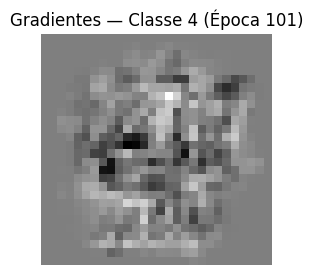

Época 101/100,  Loss = 0.08314,  Acc = 0.9970


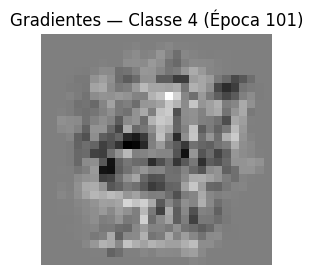

Época 101/100,  Loss = 0.08300,  Acc = 0.9970


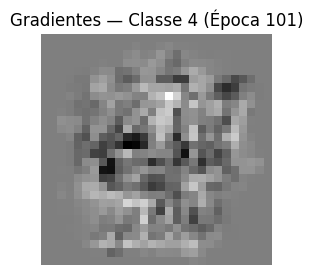

Época 101/100,  Loss = 0.08286,  Acc = 0.9970


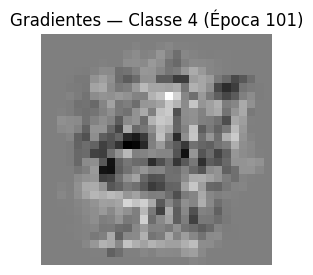

Época 101/100,  Loss = 0.08271,  Acc = 0.9970


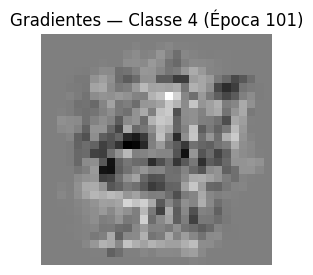

Época 101/100,  Loss = 0.08257,  Acc = 0.9970


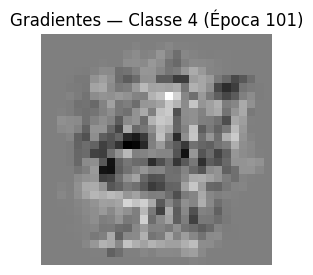

Época 101/100,  Loss = 0.08243,  Acc = 0.9970


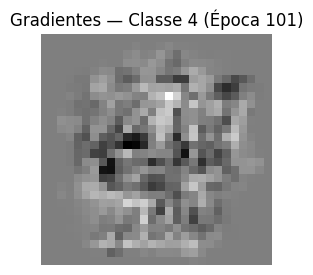

Época 101/100,  Loss = 0.08229,  Acc = 0.9970


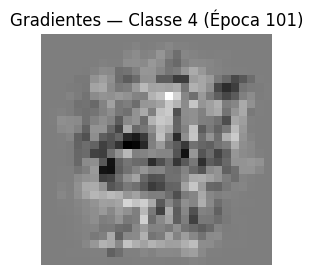

Época 101/100,  Loss = 0.08215,  Acc = 0.9970


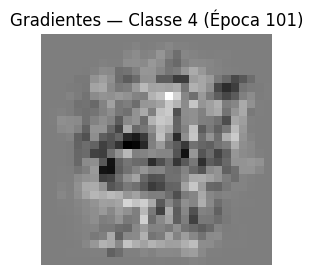

Época 101/100,  Loss = 0.08201,  Acc = 0.9970


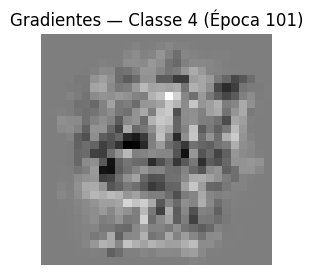

Época 101/100,  Loss = 0.08187,  Acc = 0.9970


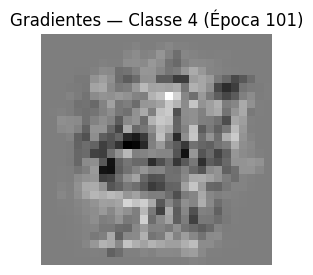

Época 101/100,  Loss = 0.08174,  Acc = 0.9970


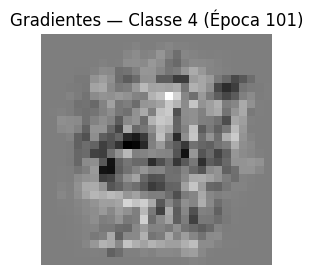

Época 101/100,  Loss = 0.08160,  Acc = 0.9970


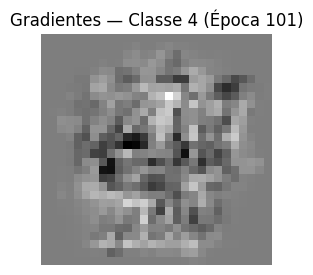

Época 101/100,  Loss = 0.08146,  Acc = 0.9970


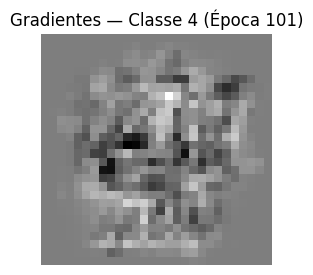

Época 101/100,  Loss = 0.08132,  Acc = 0.9970


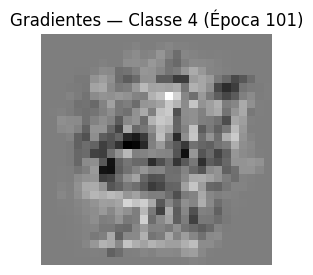

Época 101/100,  Loss = 0.08119,  Acc = 0.9970


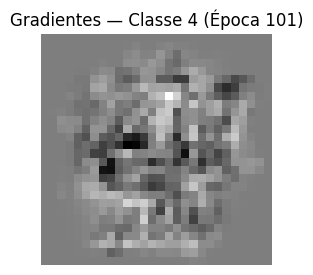

Época 101/100,  Loss = 0.08105,  Acc = 0.9970


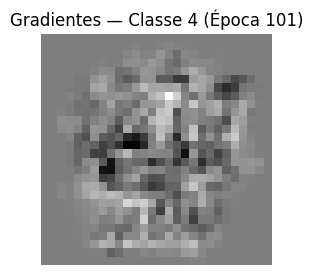

Época 101/100,  Loss = 0.08091,  Acc = 0.9970


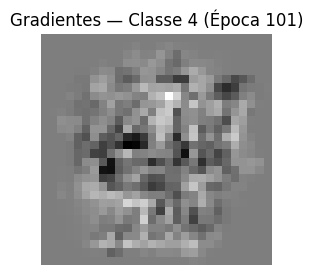

Época 101/100,  Loss = 0.08078,  Acc = 0.9980


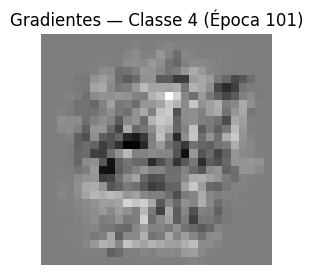

Época 101/100,  Loss = 0.08064,  Acc = 0.9980


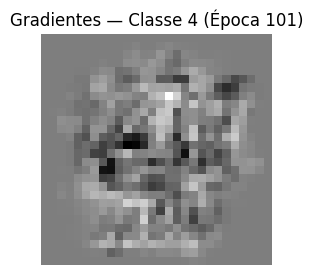

Época 101/100,  Loss = 0.08051,  Acc = 0.9980


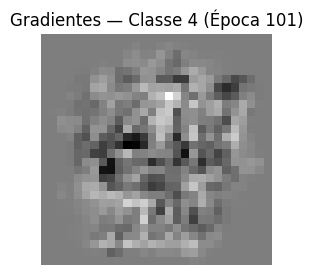

Época 101/100,  Loss = 0.08038,  Acc = 0.9980


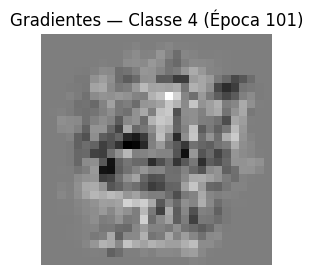

Época 101/100,  Loss = 0.08024,  Acc = 0.9980


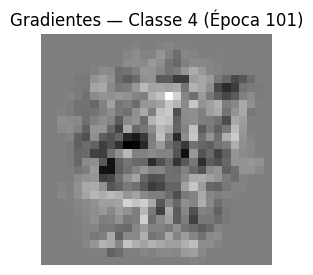

Época 101/100,  Loss = 0.08011,  Acc = 0.9980


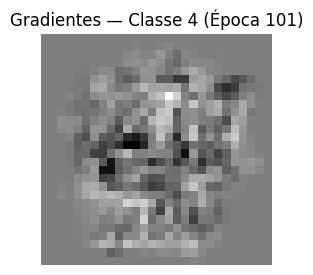

Época 101/100,  Loss = 0.07998,  Acc = 0.9980


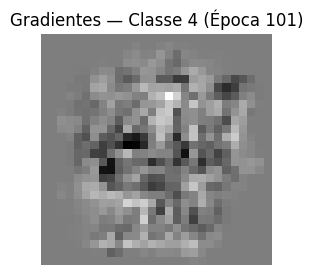

Época 101/100,  Loss = 0.07984,  Acc = 0.9980


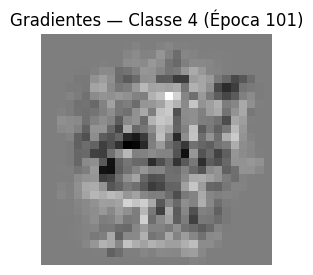

Época 101/100,  Loss = 0.07971,  Acc = 0.9980


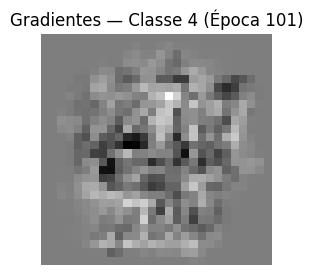

Época 101/100,  Loss = 0.07958,  Acc = 0.9980


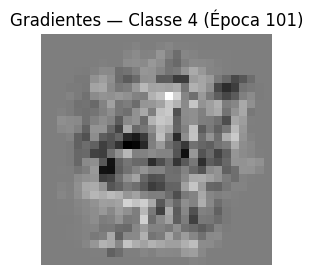

Época 101/100,  Loss = 0.07945,  Acc = 0.9980


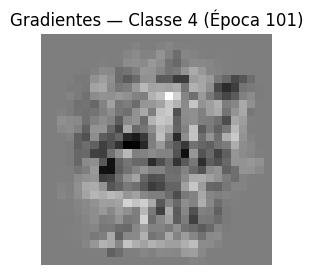

Época 101/100,  Loss = 0.07932,  Acc = 0.9980


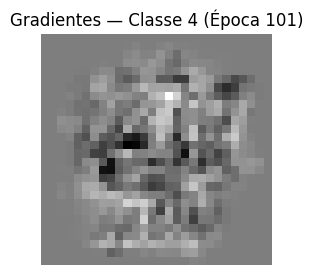

Época 101/100,  Loss = 0.07919,  Acc = 0.9980


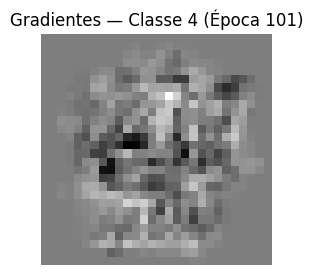

Época 101/100,  Loss = 0.07906,  Acc = 0.9980


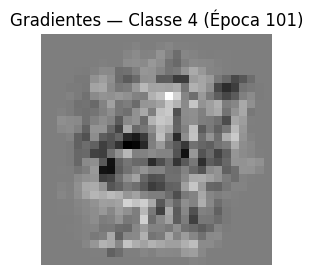

Época 101/100,  Loss = 0.07893,  Acc = 0.9980


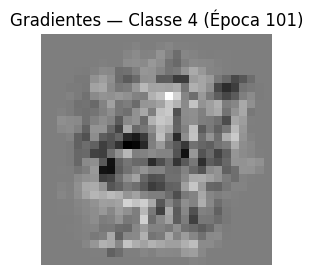

Época 101/100,  Loss = 0.07880,  Acc = 0.9980


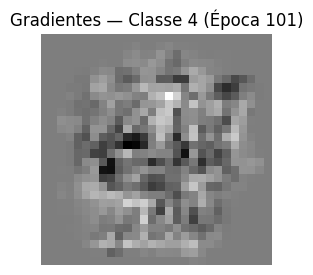

Época 101/100,  Loss = 0.07867,  Acc = 0.9980


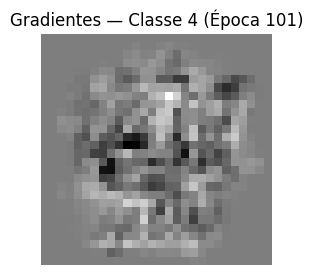

Época 101/100,  Loss = 0.07854,  Acc = 0.9980


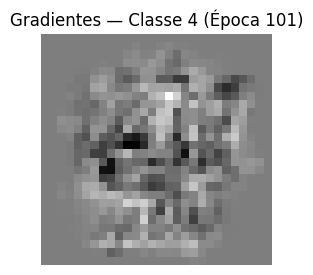

Época 101/100,  Loss = 0.07841,  Acc = 0.9980


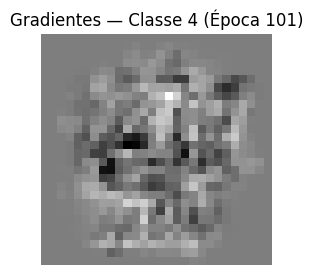

Época 101/100,  Loss = 0.07829,  Acc = 0.9980


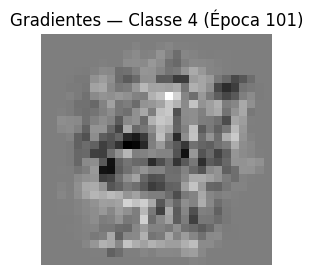

Época 101/100,  Loss = 0.07816,  Acc = 0.9980


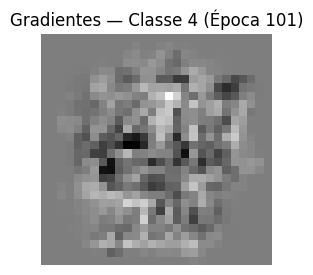

Época 101/100,  Loss = 0.07803,  Acc = 0.9980


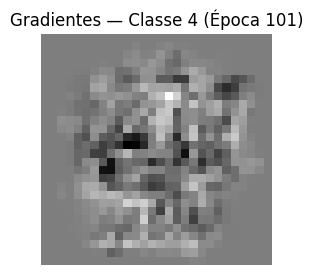

Época 101/100,  Loss = 0.07790,  Acc = 0.9980


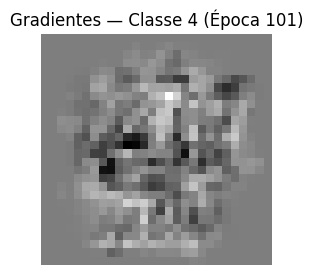

Época 101/100,  Loss = 0.07778,  Acc = 0.9980


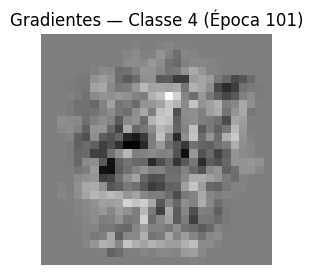

Época 101/100,  Loss = 0.07765,  Acc = 0.9980


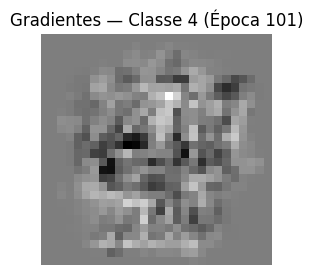

Época 101/100,  Loss = 0.07753,  Acc = 0.9980


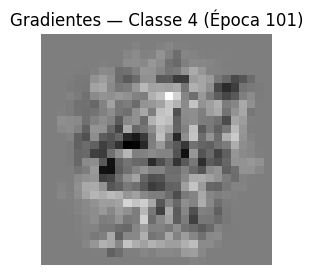

Época 101/100,  Loss = 0.07740,  Acc = 0.9980


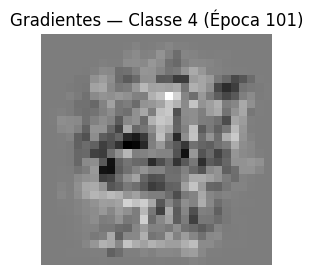

Época 101/100,  Loss = 0.07728,  Acc = 0.9980


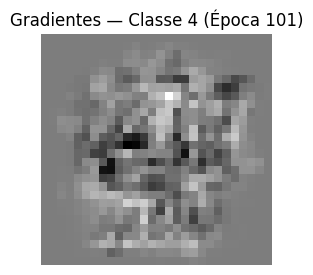

Época 101/100,  Loss = 0.07715,  Acc = 0.9980


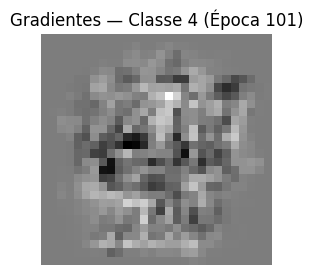

Época 101/100,  Loss = 0.07703,  Acc = 0.9980


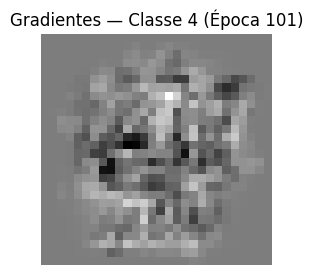

Época 101/100,  Loss = 0.07691,  Acc = 0.9980


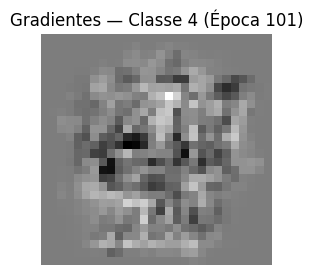

Época 101/100,  Loss = 0.07678,  Acc = 0.9980


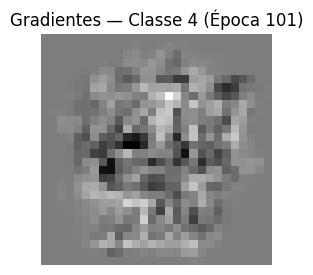

Época 101/100,  Loss = 0.07666,  Acc = 0.9980


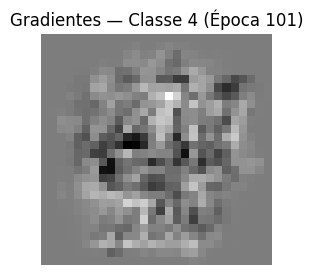

Época 101/100,  Loss = 0.07654,  Acc = 0.9980


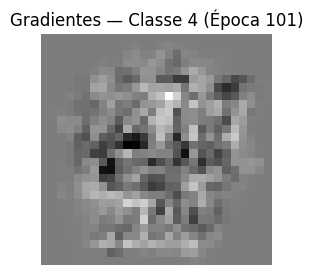

Época 101/100,  Loss = 0.07642,  Acc = 0.9980


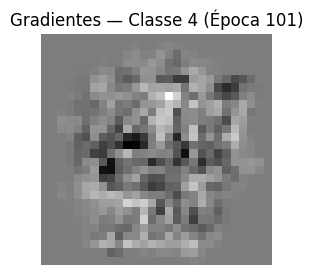

Época 101/100,  Loss = 0.07629,  Acc = 0.9980


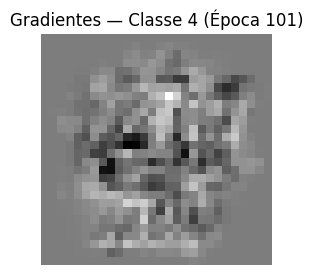

Época 101/100,  Loss = 0.07617,  Acc = 0.9980


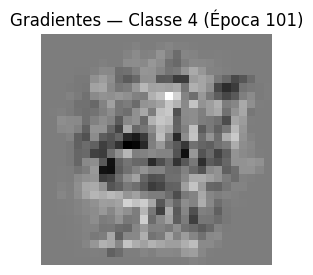

Época 101/100,  Loss = 0.07605,  Acc = 0.9980


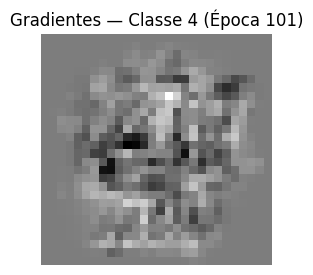

Época 101/100,  Loss = 0.07593,  Acc = 0.9980


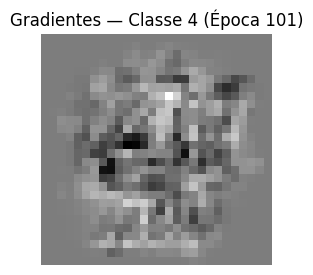

Época 101/100,  Loss = 0.07581,  Acc = 0.9980


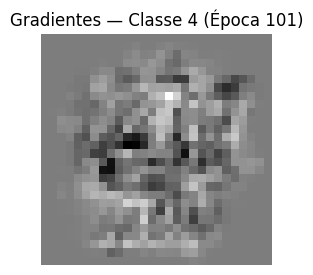

Época 101/100,  Loss = 0.07569,  Acc = 0.9980


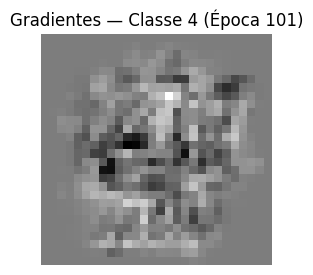

Época 101/100,  Loss = 0.07557,  Acc = 0.9980


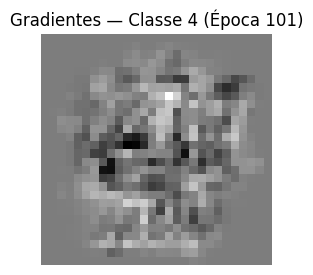

Época 101/100,  Loss = 0.07545,  Acc = 0.9980


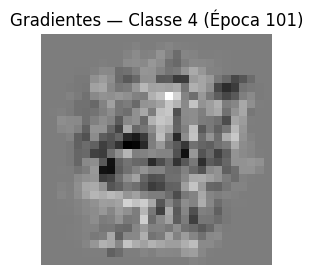

Época 101/100,  Loss = 0.07533,  Acc = 0.9980


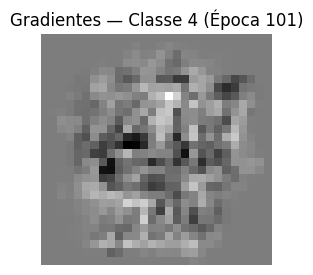

Época 101/100,  Loss = 0.07522,  Acc = 0.9980


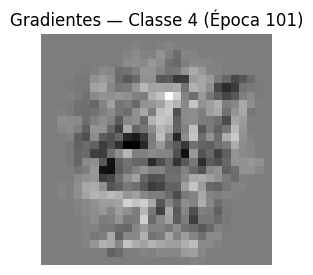

Época 101/100,  Loss = 0.07510,  Acc = 0.9980


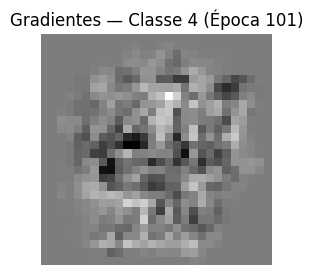

Época 101/100,  Loss = 0.07498,  Acc = 0.9980


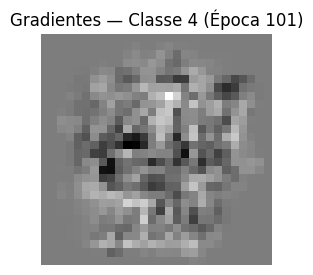

Época 101/100,  Loss = 0.07486,  Acc = 0.9980


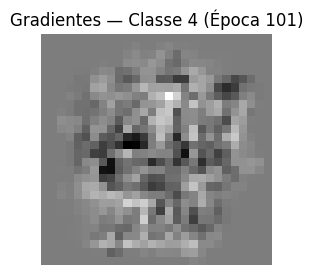

Época 101/100,  Loss = 0.07475,  Acc = 0.9980


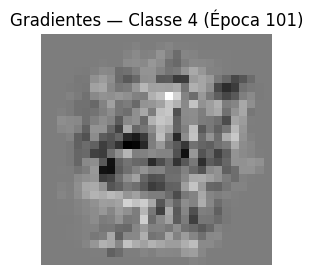

Época 101/100,  Loss = 0.07463,  Acc = 0.9980


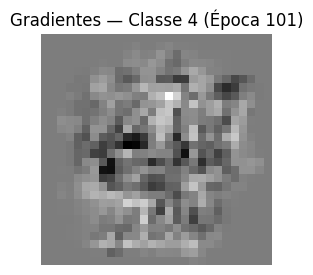

Época 101/100,  Loss = 0.07451,  Acc = 0.9980


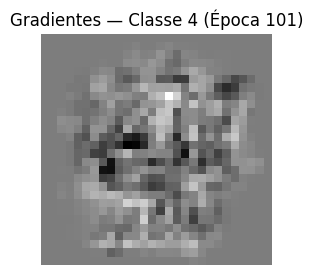

Época 101/100,  Loss = 0.07440,  Acc = 0.9980


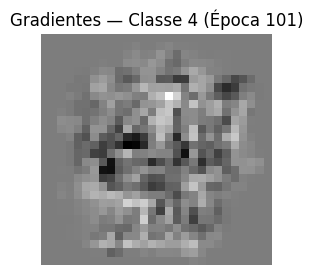

Época 101/100,  Loss = 0.07428,  Acc = 0.9980


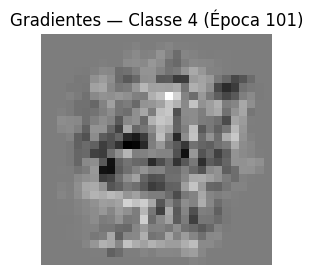

Época 101/100,  Loss = 0.07417,  Acc = 0.9980


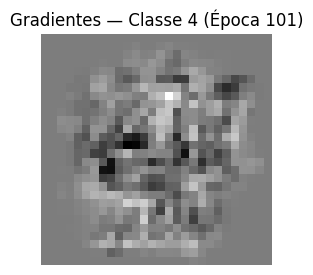

In [33]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
     # ===== EXERCÍCIO 1 =====
    print(f"Época {epochs+1:3d}/{epochs},  Loss = {loss.item():.5f},  Acc = {accuracy:.4f}")

    # ===== EXERCÍCIO 2 =====
    grad4 = model.weight.grad[4].detach().numpy()

    plt.figure(figsize=(3,3))
    plt.title(f"Gradientes — Classe 4 (Época {epochs+1})")
    plt.imshow(grad4.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()


In [20]:
print('Final loss:', loss.item())

Final loss: 0.2652943432331085


### Visualizando gráfico de perda durante o treinamento

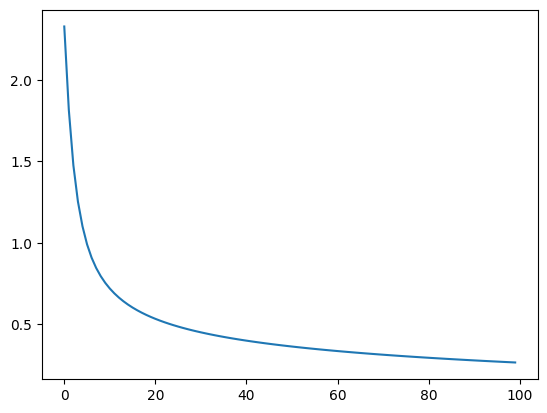

In [21]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [22]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.941


### Matriz de confusão com dados de treinamento e teste

In [23]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,1,0,0,0,1,3,1,0
2,0,1,90,1,0,1,0,1,1,1
3,0,0,0,87,0,2,0,0,0,0
4,0,0,1,0,102,1,1,2,0,3
5,0,2,0,2,0,83,0,0,2,1
6,1,0,1,1,2,2,90,0,0,0
7,0,1,2,1,0,0,0,110,0,3
8,0,2,2,0,0,1,1,0,83,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


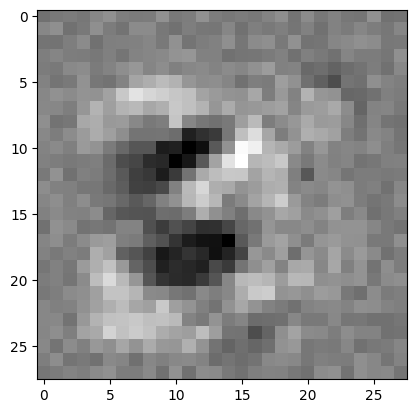

In [24]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

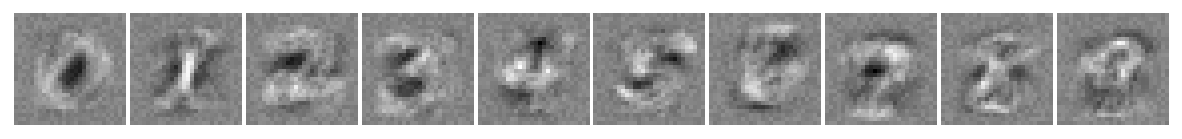

In [25]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

In [ ]:
# ===== EXERCÍCIO 1 =====
    print(f"Época {epochs+1:3d}/{epochs},  Loss = {loss.item():.5f},  Acc = {accuracy:.4f}")

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

In [ ]:
# ===== EXERCÍCIO 2 =====
    grad4 = model.weight.grad[4].detach().numpy()

    plt.figure(figsize=(3,3))
    plt.title(f"Gradientes — Classe 4 (Época {epochs+1})")
    plt.imshow(grad4.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
2. Qual é o shape da saída da rede?
3. Qual é o número total de parâmetros da rede, incluindo o bias?

# Aprendizados
